In [1]:
import numpy as np         
import os                  
import random 
import matplotlib.pyplot as plt
 
import cv2
TRAIN_DIR = 'C:/Users/Raj/Desktop/New folder/training_set/training_set'
TEST_DIR = 'C:/Users/Raj/Desktop/New folder/test_set/test_set'
IMG_SIZE = 50
LR = 1e-3

In [44]:
category=['cats','dogs']
    

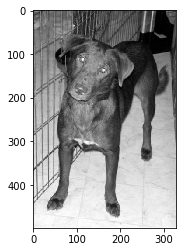

In [2]:
datadir='C:/Users/Raj/Desktop/New folder/training_set/training_set'
category=['dogs','cats']
for i in category:
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break  

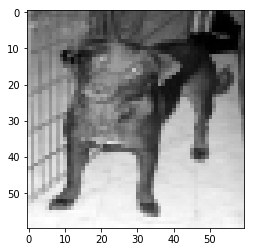

In [10]:
IMG_SIZE=60
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(new_array,cmap='gray')
plt.show()

In [11]:
training_data=[]
def create_training_data():
    for i in category:
        path=os.path.join(TRAIN_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


In [12]:
training_data

[[array([[138, 111,  89, ...,  90,  85,  83],
         [119,  96,  86, ...,  92,  77,  72],
         [131, 101, 100, ...,  81,  86,  77],
         ...,
         [249, 248, 249, ..., 235, 230, 225],
         [248, 245, 245, ..., 237, 229, 230],
         [247, 242, 245, ..., 243, 238, 237]], dtype=uint8), 0],
 [array([[110, 101, 104, ..., 124, 120, 121],
         [ 86, 106, 119, ..., 122, 123, 123],
         [124, 126, 122, ..., 123, 124, 121],
         ...,
         [202, 201, 201, ...,  96,  96,  96],
         [203, 197, 197, ...,  95,  96,  95],
         [200, 199, 202, ...,  94,  93,  93]], dtype=uint8), 0],
 [array([[186, 185, 182, ...,  34,  37,  36],
         [185, 183, 183, ...,  48,  36,  39],
         [182, 182, 183, ...,  57,  40,  32],
         ...,
         [161, 170, 172, ...,  69,  62,  61],
         [149, 157, 168, ...,  66,  65,  69],
         [165, 155, 154, ...,  65,  65,  68]], dtype=uint8), 0],
 [array([[ 14,  11,  21, ..., 115, 105, 165],
         [ 46,  54,  58, ..

In [13]:
len(training_data)

8005

In [14]:
import random
random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
0
1
0
0
1


In [16]:
testing_data=[]
def create_testing_data():
    for i in category:
        path=os.path.join(TEST_DIR,i)
        class_num=category.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()

In [17]:
testing_data

[[array([[ 66,  45,  78, ..., 135, 148, 146],
         [124, 123, 127, ..., 137, 151, 149],
         [ 93,  43,  56, ..., 145, 152, 154],
         ...,
         [126, 131, 130, ..., 144, 143, 142],
         [130, 128, 128, ..., 141, 145, 145],
         [128, 127, 125, ..., 142, 144, 144]], dtype=uint8), 0],
 [array([[ 24,  23,  23, ...,  43,  41,  31],
         [ 24,  24,  23, ...,  43,  41,  30],
         [ 24,  23,  24, ...,  43,  41,  31],
         ...,
         [131, 128, 125, ...,  28,  27,  26],
         [100, 104, 101, ...,  28,  28,  26],
         [ 97, 141, 145, ...,  28,  27,  27]], dtype=uint8), 0],
 [array([[ 7,  7,  7, ...,  2,  6,  3],
         [ 7,  7,  7, ...,  2,  4,  3],
         [ 7,  7,  7, ...,  7,  5,  7],
         ...,
         [24, 19, 24, ..., 23, 22, 19],
         [22, 21, 20, ..., 16, 18, 20],
         [24, 26, 23, ..., 20, 19, 18]], dtype=uint8), 0],
 [array([[ 42,  44, 104, ...,  47,  29,  27],
         [ 50,  47,  75, ...,  47,  22,  23],
         [ 38,  4

In [35]:
len(testing_data)

2023

In [18]:
import random
random.shuffle(testing_data)

In [19]:
for sample in testing_data[:10]:
    print(sample[1])

0
1
0
0
1
0
0
0
0
0


In [20]:
X=[]
y=[]

In [21]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [25]:
len(X)

8005

In [28]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X.shape

(8005, 60, 60, 1)

In [29]:
X.shape[1:]

(60, 60, 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [31]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [64]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
X=X/255.0

In [33]:
X

array([[[[0.69411765],
         [0.69411765],
         [0.68627451],
         ...,
         [0.01176471],
         [0.00784314],
         [0.00784314]],

        [[0.69803922],
         [0.70588235],
         [0.70196078],
         ...,
         [0.10588235],
         [0.14901961],
         [0.12156863]],

        [[0.71372549],
         [0.71764706],
         [0.72941176],
         ...,
         [0.28235294],
         [0.23137255],
         [0.16862745]],

        ...,

        [[0.33333333],
         [0.30980392],
         [0.3254902 ],
         ...,
         [0.27058824],
         [0.24705882],
         [0.25098039]],

        [[0.32156863],
         [0.34117647],
         [0.33333333],
         ...,
         [0.25490196],
         [0.24705882],
         [0.24313725]],

        [[0.32941176],
         [0.31764706],
         [0.31764706],
         ...,
         [0.26666667],
         [0.25882353],
         [0.23529412]]],


       [[[0.04705882],
         [0.03529412],
         [0.05

In [34]:
y=np.array(y,dtype=np.uint8)
y

array([1, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [36]:
model.fit(X,y,validation_split=0.3,epochs=10)

Train on 5603 samples, validate on 2402 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
5603/5603 [==============================] - 64s 11ms/sample - loss: 0.6935 - accuracy: 0.5065 - val_loss: 0.6919 - val_accuracy: 0.5150
Epoch 2/10
5603/5603 [==============================] - 59s 10ms/sample - loss: 0.6908 - accuracy: 0.5211 - val_loss: 0.6859 - val_accuracy: 0.5379
Epoch 3/10
5603/5603 [==============================] - 60s 11ms/sample - loss: 0.6862 - accuracy: 0.5406 - val_loss: 0.6866 - val_accuracy: 0.5483
Epoch 4/10
5603/5603 [==============================] - 60s 11ms/sample - loss: 0.6853 - accuracy: 0.5456 - val_loss: 0.6858 - val_accuracy: 0.5304
Epoch 5/10
5603/5603 [==============================] - 68s 12ms/sample - loss: 0.6728 - accuracy: 0.5833 - val_loss: 0.6772 - val_accuracy: 0.5729
Epoch 6/10
5603/5603 [==============================] - 69s 12ms/sample - loss: 0.6629 - accuracy: 0.6040 - val_loss: 

In [38]:
def prepare(filepath):
    img_size=60
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size),interpolation=cv2.INTER_AREA)
    return np.array(new_array).reshape(-1,img_size,img_size,1)

In [39]:
a=prepare('meow.jpg')
a=a/255
a

array([[[[0.16470588],
         [0.19215686],
         [0.17647059],
         ...,
         [0.34509804],
         [0.4745098 ],
         [0.75294118]],

        [[0.16078431],
         [0.16078431],
         [0.18039216],
         ...,
         [0.36862745],
         [0.45882353],
         [0.74901961]],

        [[0.15686275],
         [0.14901961],
         [0.19607843],
         ...,
         [0.36862745],
         [0.46666667],
         [0.75294118]],

        ...,

        [[0.09411765],
         [0.08627451],
         [0.09019608],
         ...,
         [0.25490196],
         [0.25098039],
         [0.23921569]],

        [[0.07843137],
         [0.08235294],
         [0.08627451],
         ...,
         [0.16862745],
         [0.22352941],
         [0.24313725]],

        [[0.09411765],
         [0.08627451],
         [0.08627451],
         ...,
         [0.25882353],
         [0.23137255],
         [0.14117647]]]])

In [40]:
pred=model.predict([a])
pred

array([[0.97036123]], dtype=float32)

In [41]:
model.predict_classes([a])

array([[1]])

In [42]:
b=prepare('dog.jpg')
b=b/255.0
b

array([[[[0.42745098],
         [0.40392157],
         [0.39607843],
         ...,
         [0.69019608],
         [0.6627451 ],
         [0.63137255]],

        [[0.43529412],
         [0.40784314],
         [0.4       ],
         ...,
         [0.61568627],
         [0.59607843],
         [0.57647059]],

        [[0.43137255],
         [0.40784314],
         [0.39607843],
         ...,
         [0.56862745],
         [0.56078431],
         [0.55686275]],

        ...,

        [[0.42745098],
         [0.42745098],
         [0.42352941],
         ...,
         [0.61960784],
         [0.61568627],
         [0.62352941]],

        [[0.43137255],
         [0.42745098],
         [0.42745098],
         ...,
         [0.63137255],
         [0.61568627],
         [0.61568627]],

        [[0.42352941],
         [0.42745098],
         [0.43137255],
         ...,
         [0.62745098],
         [0.61568627],
         [0.61568627]]]])

In [43]:
model.predict([b])

array([[0.28018934]], dtype=float32)

In [44]:
model.predict_classes([b])

array([[0]])

In [96]:
len(testing_data)

2023

In [103]:
x1=[]
y1=[]

In [104]:
for features,label in testing_data:
    x1.append(features)
    y1.append(label)

In [109]:
x1=np.array(x1).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x1

array([[[[ 30],
         [ 23],
         [119],
         ...,
         [  7],
         [ 11],
         [ 12]],

        [[ 16],
         [ 18],
         [ 28],
         ...,
         [ 15],
         [  8],
         [ 11]],

        [[ 11],
         [ 25],
         [ 16],
         ...,
         [ 20],
         [ 23],
         [ 13]],

        ...,

        [[125],
         [132],
         [ 95],
         ...,
         [132],
         [142],
         [104]],

        [[ 51],
         [120],
         [130],
         ...,
         [108],
         [164],
         [175]],

        [[ 88],
         [121],
         [137],
         ...,
         [162],
         [ 97],
         [183]]],


       [[[ 62],
         [101],
         [ 50],
         ...,
         [ 70],
         [ 21],
         [ 38]],

        [[ 64],
         [ 62],
         [ 81],
         ...,
         [ 66],
         [ 69],
         [ 11]],

        [[ 60],
         [ 51],
         [ 67],
         ...,
         [ 83],
         [

In [106]:
y1=np.array(y1,dtype=np.uint8)
y1

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [111]:
x1=x1/255.0

In [114]:
model.predict_classes(x1)

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [115]:
y1[:5]

array([0, 0, 1, 1, 1], dtype=uint8)

In [116]:
model.predict_classes(x1[:5])

array([[0],
       [1],
       [0],
       [1],
       [1]])